In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
rawData = pd.read_csv('source/datasets_20922_26985_Wholesale customers data.csv')
rawData

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
def visualization(dataFrameCol, colors, legendArgs, legendLoc, title, save):
    plt.figure(figsize = (6,6))
    plt.pie(dataFrameCol,
            colors = colors,
            autopct = '%.2f%%',
            textprops = {'size': 'x-large',
                        'color': '#1C5253',
                        'fontweight': 'bold'})
    plt.legend(legendArgs, loc = legendLoc)
    plt.title(title, 
            fontsize = 14,
            fontweight = 'bold')
    plt.savefig(save, dpi = 2000)
    plt.show()

In [4]:
## Channel

### First Channel (Hotels, Restaurants, Caffes)
channelOne = rawData[rawData['Channel'] == 1].count()

### Second Channel (Retail - [Normal Channel])
channelTwo = rawData[rawData['Channel'] == 2].count()

channels = pd.DataFrame(columns = ['Channel Name', 'Number of Channels'],
                        data = [['Hotels, Restaurants, Cafes', channelOne[0]],
                                 ['Retail', channelTwo[0]]])
channels

,Channel Name,Number of Channels
0,"Hotels, Restaurants, Cafes",298
1,Retail,142


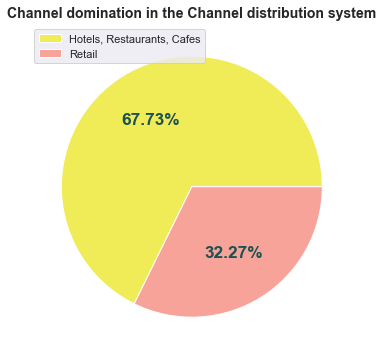

In [5]:
visualization(dataFrameCol = channels['Number of Channels'],
              colors = ['#F0EC57', '#F7A399'],
              legendArgs = channels['Channel Name'],
              legendLoc = 'upper left',
              title = 'Channel domination in the Channel distribution system',
              save =  'visualizations/CDS.png')

In [6]:
## Region
### First region - Lisnon
### Second region - Oporto
### Third region - Other

regionOne = rawData[rawData['Region'] == 1].count()
regionTwo = rawData[rawData['Region'] == 2].count()
regionThree = rawData[rawData['Region'] == 3].count()

regions = pd.DataFrame(columns = ['Region', 'Distribution channels'],
                       data = [['Lisnon (One)', regionOne[0]],
                               ['Oporto (Two)', regionTwo[0]],
                               ['Other (Three)', regionThree[0]]])
regions


,Region,Distribution channels
0,Lisnon (One),77
1,Oporto (Two),47
2,Other (Three),316


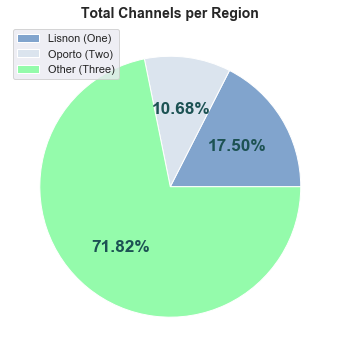

In [7]:
visualization(dataFrameCol = regions['Distribution channels'],
              colors = ['#81A4CD', '#DBE4EE', '#94FBAB'],
              legendArgs = regions['Region'],
              legendLoc = 'upper left',
              title = 'Total Channels per Region',
              save = 'visualizations/DCPR.png')

## Distribution channels inside of each region

In [8]:
rawDistCha = rawData.copy()
rawDistCha = rawDistCha.drop(['Fresh',
                              'Milk',
                              'Grocery',
                              'Frozen',
                              'Detergents_Paper',
                              'Delicassen'],
                              axis = 1)
rawDistCha

,Channel,Region
0,2,3
1,2,3
2,2,3
3,1,3
4,2,3
...,...,...
435,1,3
436,1,3
437,2,3
438,1,3


In [9]:
#### REGION ONE ####

### Channel One ###
R1C1 = rawDistCha[rawDistCha['Region'] == 1]
R1C1 = R1C1[R1C1['Channel'] == 1].count()
R1C1[0]

### Channel Two ###
R1C2 = rawDistCha[rawDistCha['Region'] == 1]
R1C2 = R1C2[R1C2['Channel'] == 2].count()
R1C2[0]

#### REGION TWO ####

### Channel One ###
R2C1 = rawDistCha[rawDistCha['Region'] == 2]
R2C1 = R2C1[R2C1['Channel'] == 1].count()
R2C1[0]

### Channel Two ###
R2C2 = rawDistCha[rawDistCha['Region'] == 2]
R2C2 = R2C2[R2C2['Channel'] == 2].count()
R2C2[0]

#### REGION THREE ####

### Channel One ###
R3C1 = rawDistCha[rawDistCha['Region'] == 3]
R3C1 = R3C1[R3C1['Channel'] == 1].count()
R3C1[0]

### Channel Two ###
R3C2 = rawDistCha[rawDistCha['Region'] == 3]
R3C2 = R3C2[R3C2['Channel'] == 2].count()
R3C2[0]

105

In [10]:
regionsChannels = pd.DataFrame(columns = ['Region', 'Channel One', 'Channel Two'],
                               data = [['Region Lisnon', R1C1[0], R1C2[0]],
                                       ['Region Oporto', R2C1[0], R2C2[0]],
                                       ['Other Regions', R3C1[0], R3C2[0]]])
regionsChannels

,Region,Channel One,Channel Two
0,Region Lisnon,59,18
1,Region Oporto,28,19
2,Other Regions,211,105


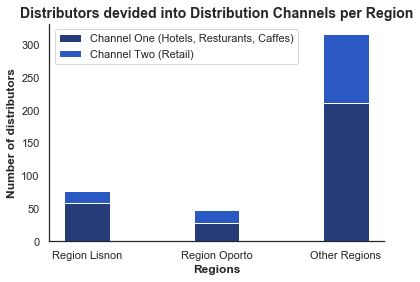

In [11]:
sns.set_style('white')
plt.bar(x = regionsChannels['Region'],
        height = [regionsChannels.at[0, 'Channel One'],
                  regionsChannels.at[1, 'Channel One'],
                  regionsChannels.at[2, 'Channel One']],
        color = '#253C78',
        width = 0.35)
plt.bar(x = regionsChannels['Region'],
        height = [regionsChannels.at[0, 'Channel Two'],
                  regionsChannels.at[1, 'Channel Two'],
                  regionsChannels.at[2, 'Channel Two']],
        color = '#2B59C3',
        bottom = [regionsChannels.at[0, 'Channel One'],
                  regionsChannels.at[1, 'Channel One'],
                  regionsChannels.at[2, 'Channel One']],
        width = 0.35)

plt.xlabel('Regions',
           fontsize = 12,
           fontweight = 'bold')

plt.ylabel('Number of distributors',
           fontsize = 12,
           fontweight = 'bold')

plt.title('Distributors devided into Distribution Channels per Region',
          fontsize = 14,
          fontweight = 'bold')
plt.legend(['Channel One (Hotels, Resturants, Caffes)',
            'Channel Two (Retail)'],
           loc = 'upper left')
sns.despine(top = True,
            right = True)
plt.savefig('visualizations/DDIDCPR.png')
plt.show()

In [12]:
rawData.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [24]:
### Product sum
## Region One
productsRegionOne = rawData[rawData['Region'] == 1]

# Channel One
PR1C1 = productsRegionOne[productsRegionOne['Channel'] == 1]
PR1C1

# # Channel Two
PR1C2 = productsRegionOne[productsRegionOne['Channel'] == 2]
PR1C2 = PR1C2

## Region Two 
productsRegionTwo = rawData[rawData['Region'] == 2]

# Channel One
PR2C1 = productsRegionTwo[productsRegionTwo['Channel'] == 1]
PR2C1 = PR2C1.sum()

# Channel Two
PR2C2 = productsRegionTwo[productsRegionTwo['Channel'] == 2]
PR2C2 = PR2C2.sum()

## Region Three
productsRegionThree = rawData[rawData['Region'] == 3]

# Channel One
PR3C1 = productsRegionThree[productsRegionThree['Channel'] == 1]
PR3C1 = PR3C1.sum()

# Channel Two
PR3C2 = productsRegionThree[productsRegionThree['Channel'] == 2]
PR3C2 = PR3C2.sum()
PR1C1.head(6)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
196,1,1,30624,7209,4897,18711,763,2876
198,1,1,11686,2154,6824,3527,592,697
199,1,1,9670,2280,2112,520,402,347
202,1,1,25203,11487,9490,5065,284,6854
203,1,1,583,685,2216,469,954,18
204,1,1,1956,891,5226,1383,5,1328


In [14]:
products = pd.DataFrame(columns = ['Region', 'Channel', 'Fresh', 'Milk', 'Grocery',                                          'Frozen', 'Detergents_Paper', 'Delicassen'],
                        data = [['1', '1', PR1C1[2], PR1C1[3], PR1C1[4], PR1C1[5], 
                                           PR1C1[6], PR1C1[7]],
                                ['1', '2', PR1C2[2], PR1C2[3], PR1C2[4], PR1C2[5], 
                                           PR1C2[6], PR1C2[7]],
                                ['2', '1', PR2C1[2], PR2C1[3], PR2C1[4], PR2C1[5], 
                                           PR2C1[6], PR2C1[7]],
                                ['2', '2', PR2C2[2], PR2C2[3], PR2C2[4], PR2C2[5], 
                                           PR2C2[6], PR2C2[7]],
                                ['3', '1', PR3C1[2], PR3C1[3], PR3C1[4], PR3C1[5], 
                                           PR3C1[6], PR3C1[7]],
                                ['3', '2', PR3C2[2], PR3C2[3], PR3C2[4], PR3C2[5], 
                                           PR3C2[6], PR3C2[7]]])
products

,Region,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,1,761233,228342,237542,184512,56081,70632
1,1,2,93600,194112,332495,46514,148055,33695
2,2,1,326215,64519,123074,160861,13516,30965
3,2,2,138506,174625,310200,29271,159795,23541
4,3,1,2928269,735753,820101,771606,165990,320358
5,3,2,1032308,1153006,1675150,158886,724420,191752


In [15]:
def vizProd(labels, chOne, colorOne, chTwo, colorTwo, title, xbar, ybar, legendArgs, legendLoc, save):

    plt.figure(figsize = (8,6))
    sns.set_style('darkgrid')
    plt.bar(x = labels,
            height = chOne,
            color = colorOne,
            width = 0.3)
    plt.bar(x = labels,
            height = chTwo,
            color = colorTwo,
            bottom = chOne,
            width = 0.3)

    plt.title(title, fontsize = 14, fontweight = 'bold')
    plt.xlabel(xbar, fontsize = 14, fontweight = 'bold')
    plt.ylabel(ybar, fontsize = 14, fontweight = 'bold')

    plt.legend(legendArgs, loc = legendLoc)

    plt.savefig(save, dpi = 2000)
    plt.show()


In [16]:
productsR1 = pd.DataFrame(columns = ['Name of product', 'Cha. One', 'Cha. Two'],
                data = [['Fresh', products.at[0, 'Fresh'], products.at[1,'Fresh']],
                        ['Milk', products.at[0, 'Milk'], products.at[1,'Milk']],
                        ['Grocery', products.at[0, 'Grocery'], products.at[1,'Grocery']],
                        ['Frozen', products.at[0, 'Frozen'], products.at[1,'Frozen']],
                        ['Detergents_Paper', products.at[0, 'Detergents_Paper'], products.at[1,'Detergents_Paper']],
        ['Delicassen', products.at[0, 'Delicassen'], products.at[1,'Delicassen']]])
productsR1

,Name of product,Cha. One,Cha. Two
0,Fresh,761233,93600
1,Milk,228342,194112
2,Grocery,237542,332495
3,Frozen,184512,46514
4,Detergents_Paper,56081,148055
5,Delicassen,70632,33695


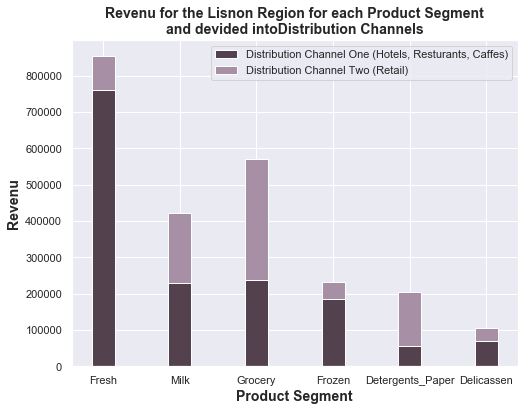

In [17]:
vizProd(labels = productsR1['Name of product'],
        chOne = productsR1['Cha. One'],
        colorOne = ['#54414E'],
        chTwo = productsR1['Cha. Two'],
        colorTwo = ['#A790A5'],
        title = 'Revenu for the Lisnon Region for each Product Segment\nand devided intoDistribution Channels',
        xbar = 'Product Segment',
        ybar = 'Revenu',
        legendArgs = ['Distribution Channel One (Hotels, Resturants, Caffes)', 'Distribution Channel Two (Retail)'],
        legendLoc = 'upper right',
        save = 'visualizations/PR1.png')

In [18]:
productsR2 = pd.DataFrame(columns = ['Name of product', 'Cha. One', 'Cha. Two'],
                data = [['Fresh', products.at[2, 'Fresh'], products.at[3,'Fresh']],
                        ['Milk', products.at[2, 'Milk'], products.at[3,'Milk']],
                        ['Grocery', products.at[2, 'Grocery'], products.at[3,'Grocery']],
                        ['Frozen', products.at[2, 'Frozen'], products.at[3,'Frozen']],
                        ['Detergents_Paper', products.at[2, 'Detergents_Paper'], products.at[3,'Detergents_Paper']],
        ['Delicassen', products.at[2, 'Delicassen'], products.at[3,'Delicassen']]])
productsR2

,Name of product,Cha. One,Cha. Two
0,Fresh,326215,138506
1,Milk,64519,174625
2,Grocery,123074,310200
3,Frozen,160861,29271
4,Detergents_Paper,13516,159795
5,Delicassen,30965,23541


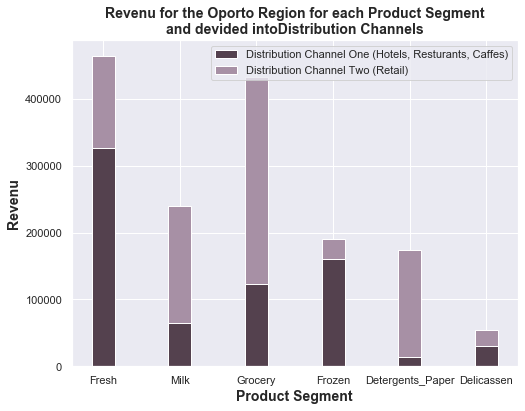

In [19]:
vizProd(labels = productsR2['Name of product'],
        chOne = productsR2['Cha. One'],
        colorOne = ['#54414E'],
        chTwo = productsR2['Cha. Two'],
        colorTwo = ['#A790A5'],
        title = 'Revenu for the Oporto Region for each Product Segment\nand devided intoDistribution Channels',
        xbar = 'Product Segment',
        ybar = 'Revenu',
        legendArgs = ['Distribution Channel One (Hotels, Resturants, Caffes)', 'Distribution Channel Two (Retail)'],
        legendLoc = 'upper right',
        save = 'visualizations/PR2.png')

In [20]:
productsR3 = pd.DataFrame(columns = ['Name of product', 'Cha. One', 'Cha. Two'],
                data = [['Fresh', products.at[4, 'Fresh'], products.at[5,'Fresh']],
                        ['Milk', products.at[4, 'Milk'], products.at[5,'Milk']],
                        ['Grocery', products.at[4, 'Grocery'], products.at[5,'Grocery']],
                        ['Frozen', products.at[4, 'Frozen'], products.at[5,'Frozen']],
                        ['Detergents_Paper', products.at[5, 'Detergents_Paper'], products.at[5,'Detergents_Paper']],
        ['Delicassen', products.at[4, 'Delicassen'], products.at[5,'Delicassen']]])
productsR3

,Name of product,Cha. One,Cha. Two
0,Fresh,2928269,1032308
1,Milk,735753,1153006
2,Grocery,820101,1675150
3,Frozen,771606,158886
4,Detergents_Paper,724420,724420
5,Delicassen,320358,191752


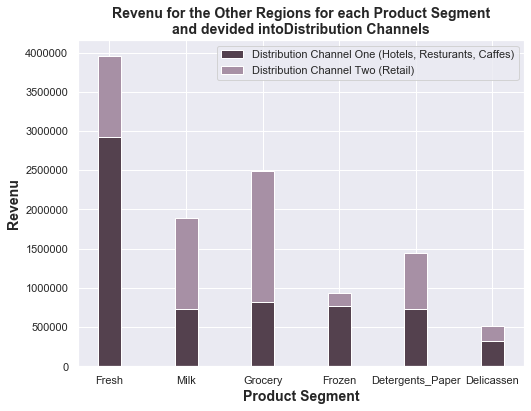

In [21]:
vizProd(labels = productsR3['Name of product'],
        chOne = productsR3['Cha. One'],
        colorOne = ['#54414E'],
        chTwo = productsR3['Cha. Two'],
        colorTwo = ['#A790A5'],
        title = 'Revenu for the Other Regions for each Product Segment\nand devided intoDistribution Channels',
        xbar = 'Product Segment',
        ybar = 'Revenu',
        legendArgs = ['Distribution Channel One (Hotels, Resturants, Caffes)', 'Distribution Channel Two (Retail)'],
        legendLoc = 'upper right',
        save = 'visualizations/PR3.png')